<a target="_blank" href="https://colab.research.google.com/github/ArtificialIntelligenceToolkit/aitk/blob/master/notebooks/Dogs-vs-Cats.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install aitk --upgrade --quiet

In [1]:
from aitk.utils.datasets import get_dataset
import aitk.networks as nets
from PIL import Image
import numpy as np

In [2]:
inputs, targets = get_dataset("dogs-vs-cats")

In [3]:
inputs.shape

(24478, 128, 128, 3)

In [4]:
targets.shape

(24478, 2)

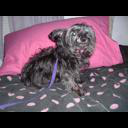

In [5]:
Image.fromarray((inputs[0] * 255).astype("uint8"))

In [69]:
from tensorflow.keras.layers import Conv2D
network = nets.SimpleNetwork(
    (128, 128, 3), 
    Conv2D(2, 3, activation="relu", input_shape=(128, 128, 3), name="conv2d"),
    "Flatten", 
    (100, "tanh"), 
    (10, "tanh"), 
    (2, "softmax"),
    loss="binary_crossentropy",
)

In [70]:
network.set_learning_rate(.1)
network.set_momentum(.1)

In [71]:
network.config["layers"]["conv2d"]["feature"] = 0

In [72]:
ds = network.input_to_dataset(inputs[0])

In [73]:
network.predict(ds)

array([[0.7334817 , 0.26651827]], dtype=float32)


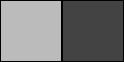
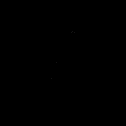
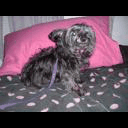

In [74]:
network.display(inputs[0], scale=0.75)

In [79]:
SIZE = 10
sample_inputs =  np.concatenate((inputs[:SIZE], inputs[-SIZE:]))
sample_targets = np.concatenate((targets[:SIZE], targets[-SIZE:]))

In [80]:
sample_targets.shape

(20, 2)

In [81]:
network.fit(
    sample_inputs,
    sample_targets,
    epochs=500,
    accuracy=1.0,
    report_rate=5,
)

Stopped because accuracy beat goal of 1.0
Epoch 107/500 



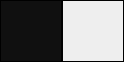
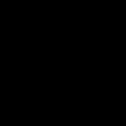
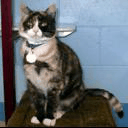

In [78]:
network.display(inputs[-1], scale=0.75)